# Aula 04

Nesta aula, trabalharemos com dados de uma estação de monitoramento da qualidade do ar em SP. Faremos as seguintes etapas:

* Formatação do arquivo em um dataframe
* Detecção de falhas
* Interpolação
* Estatística bivariada
* Regressão



In [101]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Abrindo a planilha
path = r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\1728675725931.csv"
data = pd.read_csv(path,header = 6, sep=';',encoding='latin-1')
data.head()



,Unnamed: 0,Unnamed: 1,MP2.5(Partículas Inaláveis Finas) - µg/m3,NO2(Dióxido de Nitrogênio) - µg/m3,O3(Ozônio) - µg/m3
0,01/01/2023,01:00,23.0,22.0,33.0
1,01/01/2023,02:00,60.0,35.0,6.0
2,01/01/2023,03:00,95.0,27.0,1.0
3,01/01/2023,04:00,64.0,27.0,1.0
4,01/01/2023,05:00,52.0,20.0,1.0


In [46]:
# Fazendo o merge das headers 
print(data.columns.to_list())
header = data.columns.to_list()
header[0:2] = ['date','hour']
print(header)

# Renomeando as colunas
data.columns = header
data.head()



['Unnamed: 0', 'Unnamed: 1', 'MP2.5(Partículas Inaláveis Finas) - µg/m3', 'NO2(Dióxido de Nitrogênio) - µg/m3', 'O3(Ozônio) - µg/m3']
['date', 'hour', 'MP2.5(Partículas Inaláveis Finas) - µg/m3', 'NO2(Dióxido de Nitrogênio) - µg/m3', 'O3(Ozônio) - µg/m3']


,date,hour,MP2.5(Partículas Inaláveis Finas) - µg/m3,NO2(Dióxido de Nitrogênio) - µg/m3,O3(Ozônio) - µg/m3
0,01/01/2023,01:00,23.0,22.0,33.0
1,01/01/2023,02:00,60.0,35.0,6.0
2,01/01/2023,03:00,95.0,27.0,1.0
3,01/01/2023,04:00,64.0,27.0,1.0
4,01/01/2023,05:00,52.0,20.0,1.0


In [47]:
# Acessando os valores

data['MP2.5(Partículas Inaláveis Finas) - µg/m3']

0       23.0
1       60.0
2       95.0
3       64.0
4       52.0
        ... 
8755    11.0
8756     6.0
8757     6.0
8758     2.0
8759     0.0
Name: MP2.5(Partículas Inaláveis Finas) - µg/m3, Length: 8760, dtype: float64

In [48]:
# Usando iloc

data.iloc[:,2]

0       23.0
1       60.0
2       95.0
3       64.0
4       52.0
        ... 
8755    11.0
8756     6.0
8757     6.0
8758     2.0
8759     0.0
Name: MP2.5(Partículas Inaláveis Finas) - µg/m3, Length: 8760, dtype: float64

In [52]:
# Trabalhando com as datas

data['datetimes'] =  pd.to_datetime(data['date'], format="%d/%m/%Y")
data.head()

,date,hour,MP2.5(Partículas Inaláveis Finas) - µg/m3,NO2(Dióxido de Nitrogênio) - µg/m3,O3(Ozônio) - µg/m3,datetimes
0,01/01/2023,01:00,23.0,22.0,33.0,2023-01-01
1,01/01/2023,02:00,60.0,35.0,6.0,2023-01-01
2,01/01/2023,03:00,95.0,27.0,1.0,2023-01-01
3,01/01/2023,04:00,64.0,27.0,1.0,2023-01-01
4,01/01/2023,05:00,52.0,20.0,1.0,2023-01-01


In [54]:
# Checando se o arquivo possui todas as horas medidas
print(data.shape)
print(24*365)

(8760, 6)
8760


In [59]:
# Checando se existem dados faltantes
print('tenho ' +str(np.sum(data.iloc[:,2].isna()))+' valores faltantes')


tenho 96 valores faltantes


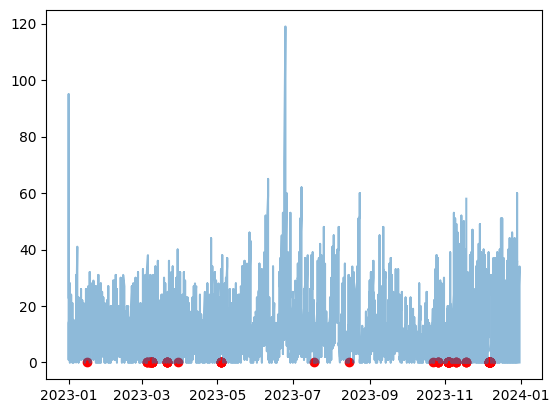

In [83]:
# Plotando a serie
fig, ax = plt.subplots()
ax.plot(data.datetimes, data.iloc[:,2], alpha=.5)

# Plotando as datas faltantes no gráfico
ax.scatter(data.datetimes[data.iloc[:,2].isna()],np.zeros(np.sum(data.iloc[:,2].isna())),color='red')

In [86]:
# Interpolando os dados

dadoInterpolado = data.iloc[:,2].interpolate()

# Checando se existem dados faltantes
print('tenho ' +str(np.sum(dadoInterpolado.isna()))+' valores faltantes')


tenho 0 valores faltantes


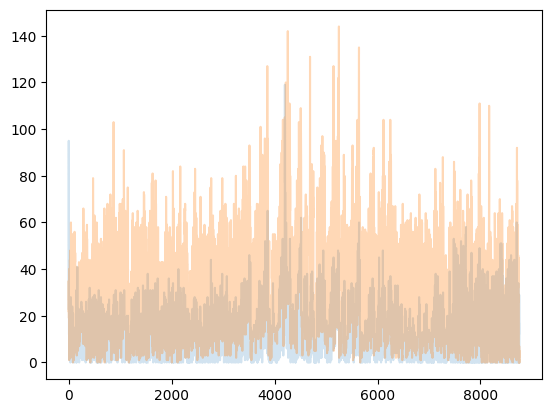

In [90]:
# Plotando todos os dados

fig,ax = plt.subplots()
ax.plot(data.iloc[:,2],alpha=0.2)
ax.plot(data.iloc[:,3],alpha=0.3)

In [94]:
# Regressão linear

from scipy import stats

res = stats.linregress(data.iloc[:,2].interpolate(), data.iloc[:,3].interpolate())

print(f"R-squared: {res.rvalue**2:.6f}")

print(res)

R-squared: 0.232988
LinregressResult(slope=np.float64(1.0358822520351318), intercept=np.float64(18.949997504902843), rvalue=np.float64(0.4826885335395513), pvalue=np.float64(0.0), stderr=np.float64(0.020083618201610563), intercept_stderr=np.float64(0.3220103318918294))


In [100]:
# Regressão usando rede neural
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(np.array(data.iloc[:,2].interpolate()).reshape(-1, 1)
                                                    , np.array(data.iloc[:,3].interpolate()).reshape(-1, 1),
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

C:\Users\Leonardo.Hoinaski\Documents\ENS410064\pyEnv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23437139333907053